11501568/11490434 [==============================] - 0s 0us/step
Train Image Number : 60000, Test Image Number : 10000


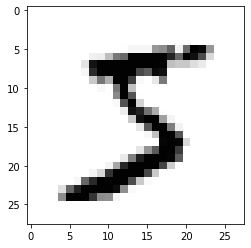

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [ ]:
#실행하시기 전에 속도를 높일려면 [런타임]-[런타임 유형 변경]-[하드웨어 가속기 : GPU]를 선택하시고 저장하시면 됩니다. 

import numpy
import sys
import os
import matplotlib.pyplot as plt
import tensorflow as tf

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data() # MNIST 손글씨 데이터셋 불러오기

print("Train Image Number : %d, Test Image Number : %d" % (X_train.shape[0], X_test.shape[0]))
plt.imshow(X_train[0], cmap='Greys')
plt.show()


for x in X_train[0]: # data 출력
    for i in x:
        print('%d\t' % i, end='')
    print()

# 데이터 변환
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print("class : %d " % (Y_train[0])) # 부류 확인

Y_train = tf.keras.utils.to_categorical(Y_train, 10) # 바이너리화 과정
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

print(Y_train[0])

!nvidia-smi

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
298/300 [============================>.] - ETA: 0s - loss: 0.3009 - accuracy: 0.9166
Epoch 1: val_loss improved from inf to 0.14927, saving model to ./model1/01-0.1493.hdf5
300/300 [==============================] - 4s 5ms/step - loss: 0.3000 - accuracy: 0.9169 - val_loss: 0.1493 - val_accuracy: 0.9575
Epoch 2/20
298/300 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 0.9648
Epoch 2: val_loss improved from 0.1

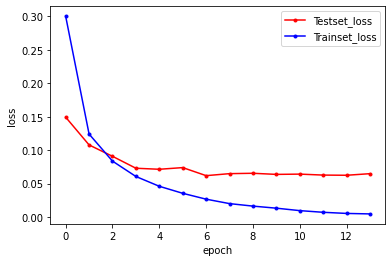

In [ ]:
import tensorflow as tf
import os

# 모델 레이어 설정
model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, input_dim=784, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# 모델의 저장 장소 설정 (구글 드라이브가 아닌, colab의 저장소임)
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath1="./model1/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer1 = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath1, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=200, verbose=1, callbacks=[early_stopping_callback1,checkpointer1])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']
y_loss =  history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

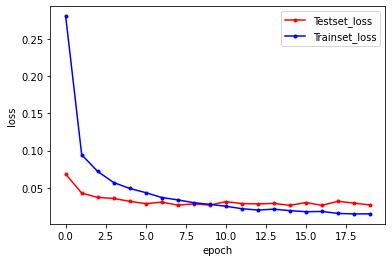

In [ ]:
#CNN에 적용 가능한 데이터로 변환
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,  activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
  ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# 모델 최적화 설정
MODEL_DIR = './model2/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath2="./model2/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer2 = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath2, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=200, 
                    verbose=1, callbacks=[early_stopping_callback2,checkpointer2])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()